In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df1 = pd.read_excel('Market Table.xlsx')
df1.head()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market
0,1,AgriTech,326,Market Competition,Social Media Marketing,2.0
1,2,FinTech,249,Market Competition,Social Media Marketing,3.0
2,3,FinTech,915,Product Development Issues,Content Marketing,2.0
3,4,RetailTech,620,Scaling and Growth,Direct Marketing,2.0
4,5,RetailTech,609,Financial Constraints,Content Marketing,1.0


In [18]:
df1.tail(2)

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market
1998,1999,EdTech,928,Scaling and Growth,Influencer Marketing,1.0
1999,2000,FoodTech,184,Financial Constraints,Direct Marketing,2.0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maket ID            2000 non-null   int64  
 1   Startup Type        2000 non-null   object 
 2   Company Size        2000 non-null   int64  
 3   Challenges          2000 non-null   object 
 4   Marketing Strategy  2000 non-null   object 
 5   Years in Market     1995 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 93.9+ KB


In [22]:
df1.shape

(2000, 6)

In [26]:
df1.duplicated().sum()

0

In [28]:
df1.isna().sum()

Maket ID              0
Startup Type          0
Company Size          0
Challenges            0
Marketing Strategy    0
Years in Market       5
dtype: int64

In [30]:
df1.isnull().sum()

Maket ID              0
Startup Type          0
Company Size          0
Challenges            0
Marketing Strategy    0
Years in Market       5
dtype: int64

In [34]:
df1['Years in Market'].nunique()

3

In [36]:
df1['Years in Market'].unique()

array([ 2.,  3.,  1., nan])

In [48]:
df1['Years in Market'] = df1['Years in Market'].fillna (df1['Years in Market'].shift(1))   
df1.isnull().sum()

Maket ID              0
Startup Type          0
Company Size          0
Challenges            0
Marketing Strategy    0
Years in Market       0
dtype: int64

In [56]:
df1['Years in Market'] = df1['Years in Market'].astype(int)
print(df1['Years in Market'].dtype)

int32


In [78]:
df1['Years in Market'] = df1['Years in Market'].astype('int8')
print(df1['Years in Market'].dtype )

int8


In [74]:
df1['Years in Market'].value_counts()

Years in Market
1    711
3    651
2    638
Name: count, dtype: int64

In [80]:
df1['Company Size'].describe()

count    2000.000000
mean      501.331500
std       291.169663
min      -800.000000
25%       246.000000
50%       507.500000
75%       755.250000
max      1000.000000
Name: Company Size, dtype: float64

In [84]:
df1['Company Size'] = df1['Company Size'].replace(-800, 800)	
df1['Company Size'].describe()

count    2000.000000
mean      502.131500
std       289.787164
min         5.000000
25%       246.750000
50%       508.000000
75%       756.000000
max      1000.000000
Name: Company Size, dtype: float64

<Figure size 700x500 with 0 Axes>

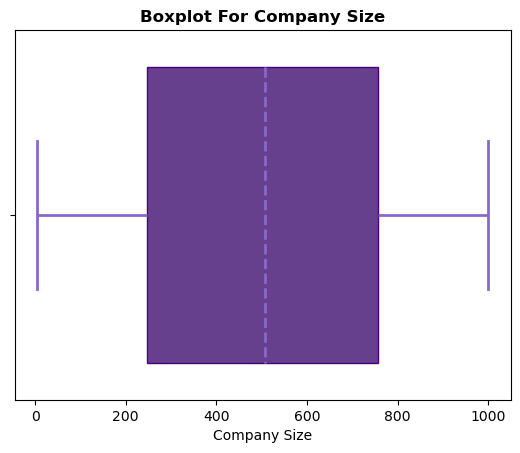

<Figure size 700x500 with 0 Axes>

In [98]:
sns.boxplot(x = 'Company Size' , data = df1 , 
           color='#663399',
           boxprops=dict(edgecolor='#4B0082', linewidth=1),
           medianprops=dict(color='#8968CD', linewidth=2, linestyle = '--'), 
           whiskerprops=dict(color='#8968CD', linewidth=2),
           capprops=dict(color='#8968CD', linewidth=2),
           flierprops=dict(marker='.', color='yellow', markersize=10) )
plt.title ('Boxplot For Company Size' , fontweight = 'bold')
plt.figure(figsize = (7,5))


In [106]:
def company_size(size):
    if 0 <= size <= 10:
        return '0-10'
    elif 10 <= size <= 50:
        return '11-50'
    elif 50 <= size <= 200:
        return '51-200'
    elif 200 <= size <= 500:
        return '201-500'
    elif 500 <= size <= 1000:
        return '501-1000'
    else: 
        return 'Other'
df1['company_size'] = df1['Company Size'].apply(company_size)
df1.head(

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market,company_size
0,1,AgriTech,326,Market Competition,Social Media Marketing,2,201-500
1,2,FinTech,249,Market Competition,Social Media Marketing,3,201-500
2,3,FinTech,915,Product Development Issues,Content Marketing,2,501-1000


In [118]:
df1['company_size'].value_counts()

company_size
501-1000    1009
201-500      588
51-200       304
11-50         89
0-10          10
Name: count, dtype: int64

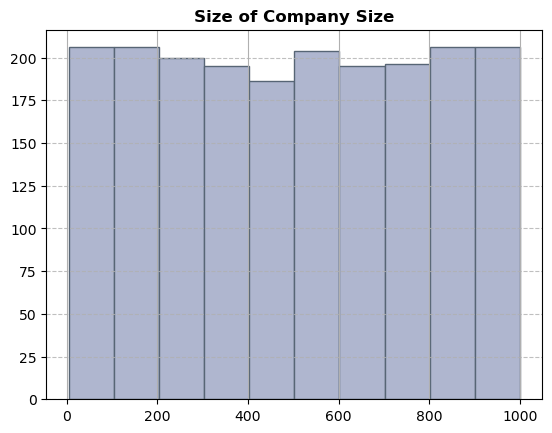

In [172]:
df1['Company Size'].hist(color = '#AFB6CF' , edgecolor = '#576575', alpha=1)
plt.title('Size of Company Size' , fontweight='bold')
plt.grid( axis='y' , linestyle= '--' , alpha = 0.8)

([<matplotlib.patches.Wedge at 0x1f905ea14f0>,
 [Text(-0.6950835190341631, -0.8525602040718793, '501-1000'),
  Text(1.0647699158899304, 0.2761612322824312, '201-500'),
  Text(-0.09242803561114261, 1.0961099663049623, '51-200'),
  Text(-0.709856633816464, 0.8402996842952868, '11-50'),
  Text(-0.8314386688310991, 0.720215065082903, '0-10')])

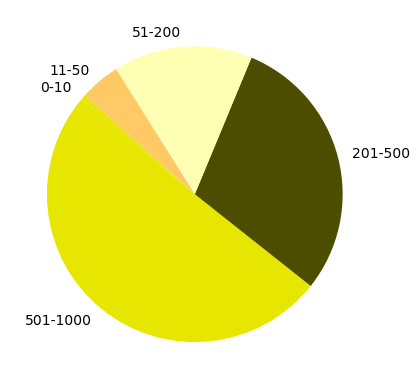

In [192]:
pie_chart = df1['company_size'].value_counts()
labels = pie_chart.index
plt.pie(pie_chart, labels = labels, colors=['#e6e600' , '#4d4d00' , '#ffffb3' ,'#ffc966'], startangle = 140) 

In [ ]:
df.to_excel('Updated Startup.xlsx' , index = False)

In [ ]:
df.to_excel('Updated Market_data.xlsx' , index = False)